In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [4]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [5]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
df.duplicated().sum()

0

# Exploration Summary

1. We have dataframe of 9827 rows and 9 columns.
2. We have no nan values and duplicate values.
3. Release_Date has to be casted in datetime and extract year only.
4. Overview,Original_Language,Poster_URL are not important for analysis so we drop them.
5. Vote_Average has to be categorized for better analysis.
6. Genre column has comma seperated values and white spaces that needs to handle and caste into categories.

In [7]:
df['Release_Date']= pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [8]:
df['Release_Date']=df['Release_Date'].dt.year
print(df['Release_Date'].dtypes)

int32


In [9]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [10]:
df.drop(['Overview','Original_Language','Poster_Url'], axis =1, inplace=True)

In [11]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


#Categorizing Vote_Average column

We categorize this column values into four- popular, average, not popular, below average.

In [12]:
def categorize_col(x):
    if x<= df['Vote_Average'].quantile(0.25):
        return 'not_popular'
    elif x<= df['Vote_Average'].quantile(0.50):
        return 'below_average'
    elif x<= df['Vote_Average'].quantile(0.75):
        return 'average'
    else:
        return'popular'

df['Vote_Average']= df['Vote_Average'].apply(categorize_col)
    
df['Vote_Average'].nunique()

4

In [13]:
df.tail()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"
9826,1984,Threads,13.354,186,popular,"War, Drama, Science Fiction"


In [14]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular      2567
popular          2450
average          2412
below_average    2398
Name: count, dtype: int64

In [15]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# We split Genre column into list and explode our dataframe to have one genre per row for each movie

In [16]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [17]:
df['Genre']= df['Genre'].str.split(', ')
df= df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [18]:
# Casting column into categories

df['Genre']= df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  object  
 5   Genre         25793 non-null  category
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 932.8+ KB


# Data Visualization

In [20]:
sns.set_style('whitegrid')

# What is most frequent genre of movie released on Netflix?

In [21]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

Text(0.5, 1.0, 'Genre column distribution')

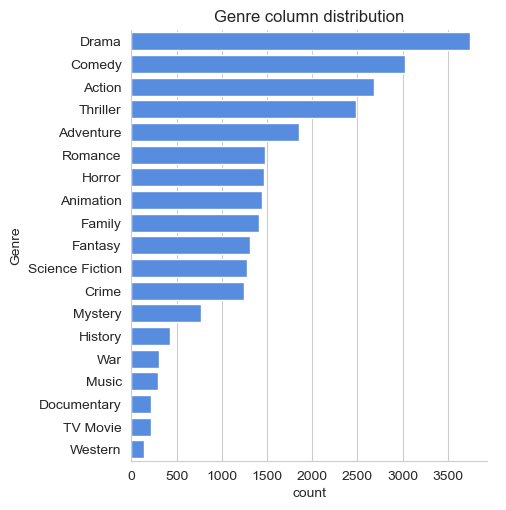

In [22]:
sns.catplot( y='Genre', data = df, kind='count', order= df['Genre'].value_counts().index, color= '#4287f5')
plt.title('Genre column distribution')

# Which has highest vote in Vote_Average column?

In [23]:
df['Vote_Average'].describe()

count       25793
unique          4
top       average
freq         6613
Name: Vote_Average, dtype: object

Text(0.5, 1.0, 'Vote distribution')

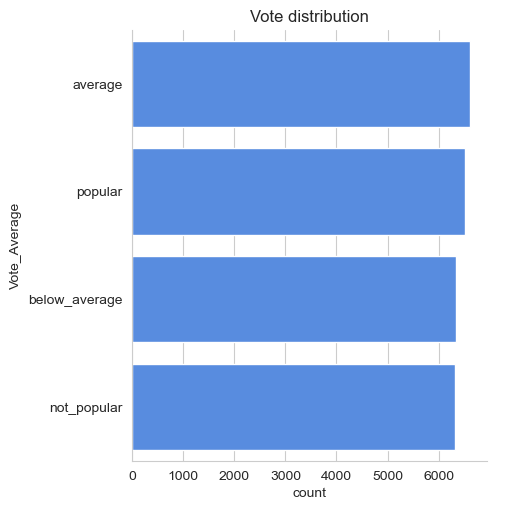

In [24]:
sns.catplot( y='Vote_Average', data = df, kind='count', order= df['Vote_Average'].value_counts().index, color= '#4287f5')
plt.title('Vote distribution')

# Which movie got highest popularity and what its genre?

In [25]:
df[df['Popularity']== df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# Which movie got lowest popularity and what its genre?

In [26]:
df[df['Popularity']== df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


# Which year has most filmmed movies?

Text(0, 0.5, 'Frequency')

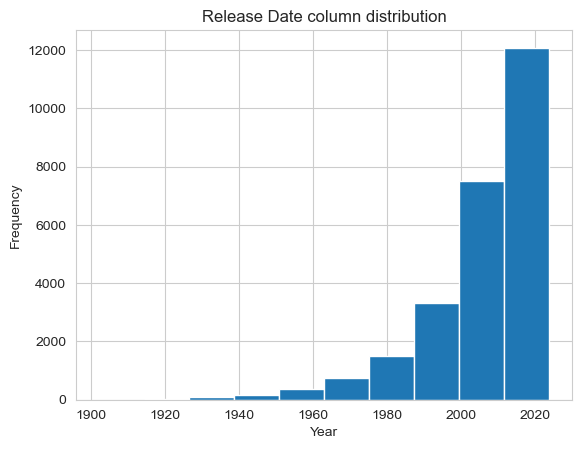

In [27]:
df['Release_Date'].hist()
plt.title('Release Date column distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')